In [1]:
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import tqdm as tq

2025-06-23 15:45:35.397214: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir ='/Users/apple/Desktop/data/emotion reco/images/train'
test_dir =  '/Users/apple/Desktop/data/emotion reco/images/validation'

In [3]:
def dataframe(dir):
    paths = []
    labels = []
    for label in os.listdir(dir):
        for image in os.listdir(os.path.join(dir,label)):
            paths.append(os.path.join(dir,label,image))
            labels.append(label)
    return paths,labels
    

In [4]:
df = pd.DataFrame()
df['image'],df['emotion'] = dataframe(train_dir)

In [5]:
df['image'][:5]

0    /Users/apple/Desktop/data/emotion reco/images/...
1    /Users/apple/Desktop/data/emotion reco/images/...
2    /Users/apple/Desktop/data/emotion reco/images/...
3    /Users/apple/Desktop/data/emotion reco/images/...
4    /Users/apple/Desktop/data/emotion reco/images/...
Name: image, dtype: object

In [6]:
df['emotion'][:5]

0    happy
1    happy
2    happy
3    happy
4    happy
Name: emotion, dtype: object

In [7]:
df.head()

,image,emotion
0,/Users/apple/Desktop/data/emotion reco/images/...,happy
1,/Users/apple/Desktop/data/emotion reco/images/...,happy
2,/Users/apple/Desktop/data/emotion reco/images/...,happy
3,/Users/apple/Desktop/data/emotion reco/images/...,happy
4,/Users/apple/Desktop/data/emotion reco/images/...,happy


In [8]:
df['emotion'].value_counts()

emotion
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

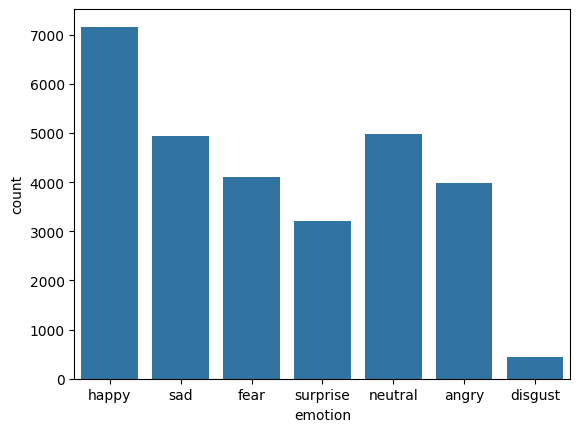

In [9]:
sns.countplot(x = df['emotion'])

In [10]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale', target_size=(48, 48))
        img = img_to_array(img)
        features.append(img)
    features = np.array(features)
    return features

In [12]:
train_feature = extract_features(df['image'])

100%|██████████████████████████████████████████████████████| 28821/28821 [00:21<00:00, 1325.47it/s]


In [13]:
x_train = train_feature/255.0  #normilization

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(df['emotion'])

LabelEncoder()

In [16]:
y_train = le.transform(df['emotion'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)  #biniary max 7 digits

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()


model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(7, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
testdf = pd.DataFrame()
testdf['image'], testdf['emotion'] = dataframe(test_dir)

In [31]:
test_features = extract_features(testdf['image'])

100%|████████████████████████████████████████████████████████| 7066/7066 [00:05<00:00, 1257.49it/s]


In [32]:
x_test = test_features/255.0

In [33]:
le.fit(testdf['emotion'])
y_test = le.transform(testdf['emotion'])
y_test = to_categorical(y_test,num_classes = 7)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=2, restore_best_weights=True)

model.fit(x_train,y_train,batch_size = 32 , epochs = 50, validation_split=0.2, callbacks=[early_stop],validation_data=(x_test, y_test))


Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 523s 580ms/step - accuracy: 0.2433 - loss: 1.8347 - val_accuracy: 0.2594 - val_loss: 1.7785
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 561s 623ms/step - accuracy: 0.2613 - loss: 1.7772 - val_accuracy: 0.3038 - val_loss: 1.7066
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 976s 1s/step - accuracy: 0.2999 - loss: 1.7165 - val_accuracy: 0.3459 - val_loss: 1.6489
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 507s 563ms/step - accuracy: 0.3415 - loss: 1.6553 - val_accuracy: 0.4148 - val_loss: 1.5341
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 798s 885ms/step - accuracy: 0.3805 - loss: 1.5880 - val_accuracy: 0.4263 - val_loss: 1.4721
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1173s 1s/step - accuracy: 0.3985 - loss: 1.5457 - val_accuracy: 0.4506 - val_loss: 1.4208
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1031s 1s/step - accuracy: 0.4167 - loss: 1.5086 - val_accuracy: 0.4642 - val_loss: 1.4068
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 1028s 1s/step - accuracy: 0.4185 - loss: 1.

In [36]:
model_json = model.to_json()# Python - Javascript server - client
with open('faceemotion.json','w') as json_file:
    json_file.write(model_json)
model.save('faceemotion.h5')

In [38]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


221/221 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - accuracy: 0.6602 - loss: 0.9336
Test Accuracy: 51.66%
